In [1]:
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

from funcoes_ajuda import avalia_clf

In [2]:
# Carregar os dados.
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Tratar variável age.
titanic['age'] = titanic.age.fillna(titanic.age.mean())

# Remover variáveis redundantes.
titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], inplace=True)

# Transformar variáveis string em dummies.
titanic = pd.get_dummies(titanic, drop_first=True)

In [4]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [5]:
# Dividindo a base em treino e teste.

# Selecionar variáveis preditoras e a variável resposta.
X = titanic.drop(columns = ['survived'])
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# conferindo número de linhas e colunas.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(668, 8)
(668,)
(223, 8)
(223,)


In [13]:
# Treinando a árvore.

# Criar o modelo de árvore de decisão.
arvore = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)

# Treinar o modelo.
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 81.4%
A acurácia balanceada da árvore é: 79.7%
AUC-ROC: 86.40%
GINI: 72.80%

               precision    recall  f1-score   support

           0       0.83      0.88      0.85       407
           1       0.79      0.72      0.75       261

    accuracy                           0.81       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.81      0.81       668



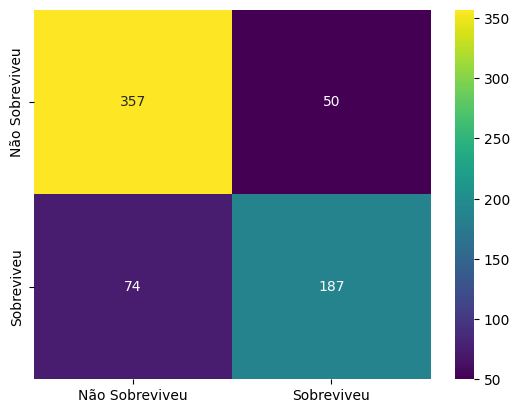

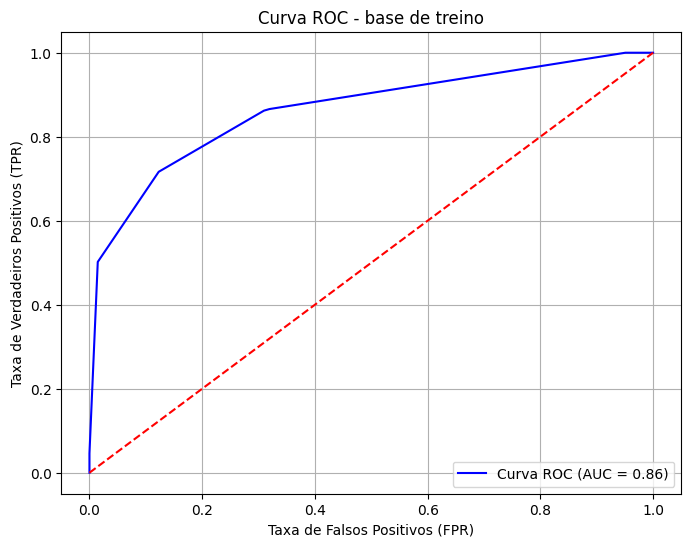

In [14]:
# Avaliando o modelo na base de treino.
print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train)

Avaliando a base de teste:

Base de treino:
A acurácia da árvore é: 85.7%
A acurácia balanceada da árvore é: 82.6%
AUC-ROC: 86.36%
GINI: 72.73%

               precision    recall  f1-score   support

           0       0.85      0.94      0.89       142
           1       0.87      0.72      0.78        81

    accuracy                           0.86       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.86      0.85       223



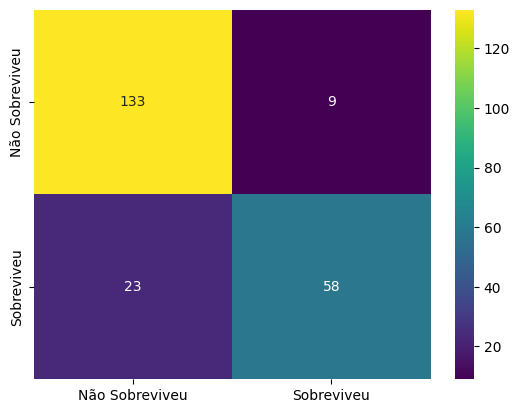

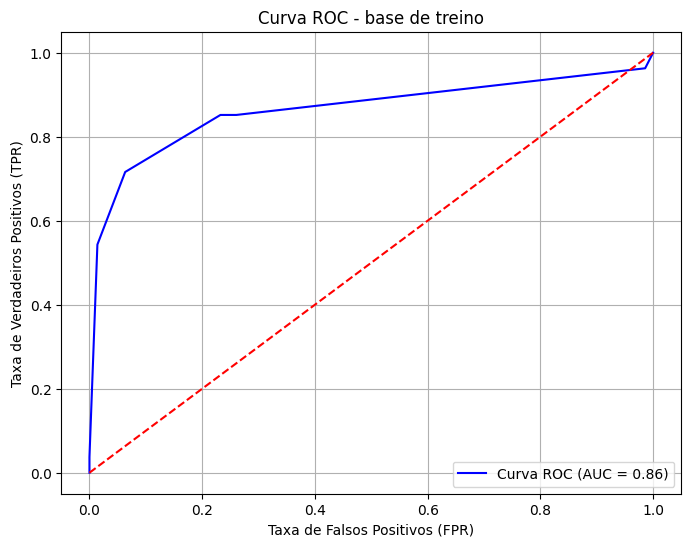

In [15]:
# Avaliando o modelo na base de teste.
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test)

In [16]:
# Deixando a árvore ser feliz.
arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, random_state=42, ccp_alpha=0)

# Treinar o modelo.
arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=30, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 98.5%
A acurácia balanceada da árvore é: 98.1%
AUC-ROC: 99.94%
GINI: 99.89%

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       407
           1       1.00      0.96      0.98       261

    accuracy                           0.99       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.99      0.99      0.98       668



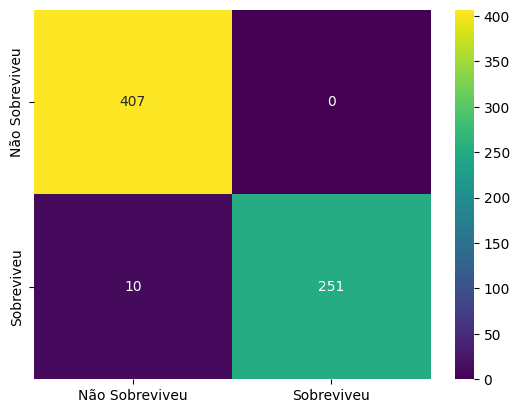

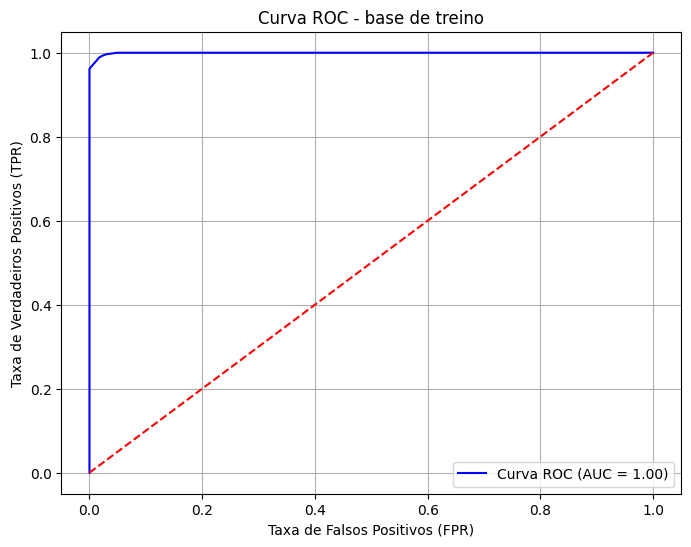

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 78.0%
A acurácia balanceada da árvore é: 76.6%
AUC-ROC: 76.98%
GINI: 53.96%

               precision    recall  f1-score   support

           0       0.83      0.82      0.83       142
           1       0.69      0.72      0.70        81

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223



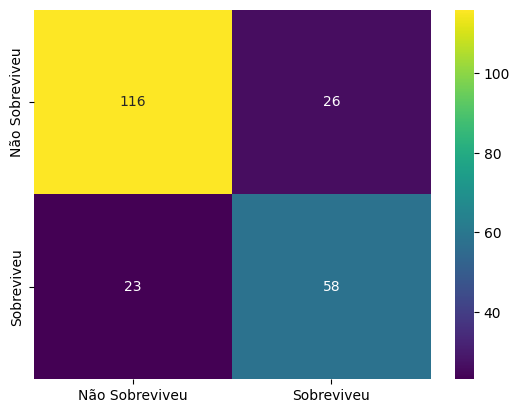

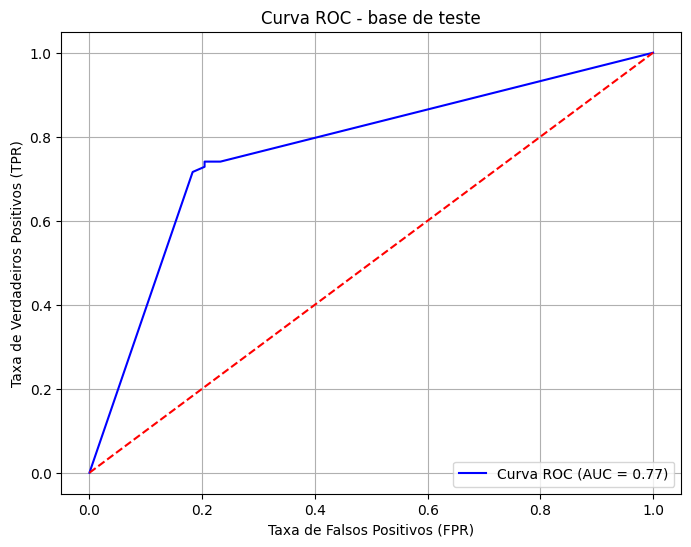

In [18]:
# Avaliando o modelo na base de treino e teste.

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')

In [21]:
# ccp_alpha.
ccp_path = pd.DataFrame(arvore.cost_complexity_pruning_path(X_train, y_train))
ccp_path.head()

,ccp_alphas,impurities
0,0.000000,0.017382
1,0.000033,0.017415
2,0.000050,0.017465
3,0.000113,0.017578
4,0.000424,0.018002


O GINI máximo é de: 77.86%
Obtido com um ccp de: 0.002691949434464401


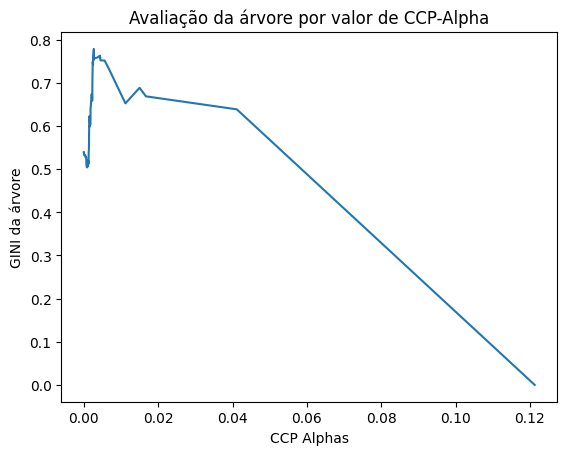

In [23]:
# Tunando a árvore.
GINIs = []

for ccp in ccp_path['ccp_alphas']:
    arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, random_state=42, ccp_alpha=ccp)

    # Treinar o modelo.
    arvore.fit(X_train, y_train)
    AUC = roc_auc_score(y_test, arvore.predict_proba(X_test)[:, -1])
    GINI = (AUC-0.5)*2
    GINIs.append(GINI)

sns.lineplot(x = ccp_path['ccp_alphas'], y = GINIs)

df_avaliacoes = pd.DataFrame({'ccp': ccp_path['ccp_alphas'], 'GINI': GINIs})

GINI_max = df_avaliacoes.GINI.max()
ccp_max  = df_avaliacoes.loc[df_avaliacoes.GINI == GINI_max, 'ccp'].values[0]

plt.ylabel('GINI da árvore')
plt.xlabel('CCP Alphas')
plt.title('Avaliação da árvore por valor de CCP-Alpha')

print(f'O GINI máximo é de: {GINI_max:.2%}\nObtido com um ccp de: {ccp_max}')

In [24]:
# Árvore ótima.
arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, random_state=42, ccp_alpha=ccp_max).fit(X_train, y_train)


Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 87.0%
A acurácia balanceada da árvore é: 84.5%
AUC-ROC: 89.64%
GINI: 79.28%

               precision    recall  f1-score   support

           0       0.85      0.96      0.90       407
           1       0.92      0.73      0.81       261

    accuracy                           0.87       668
   macro avg       0.88      0.85      0.86       668
weighted avg       0.88      0.87      0.87       668



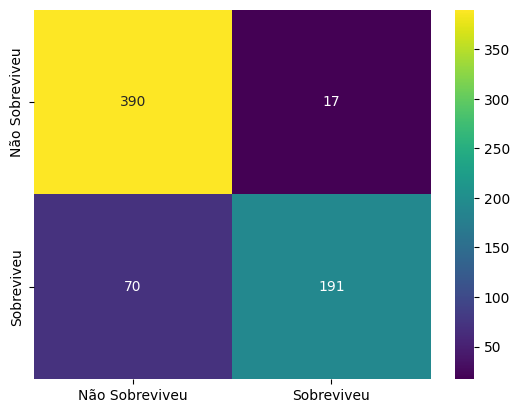

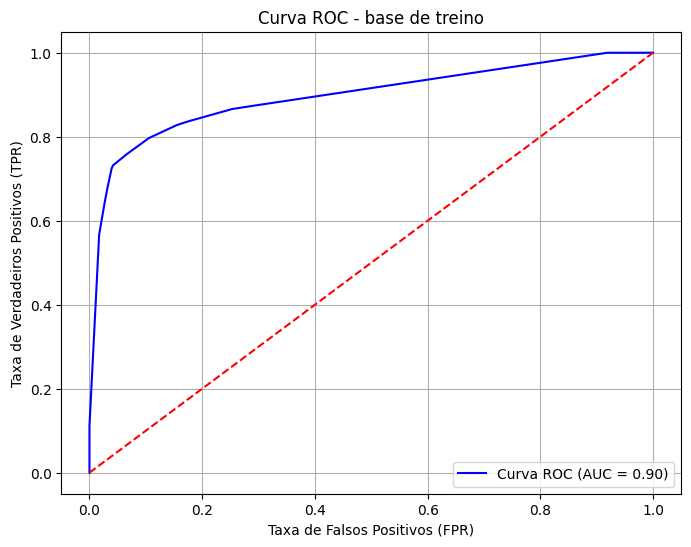

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 87.0%
A acurácia balanceada da árvore é: 84.0%
AUC-ROC: 88.93%
GINI: 77.86%

               precision    recall  f1-score   support

           0       0.86      0.95      0.90       142
           1       0.89      0.73      0.80        81

    accuracy                           0.87       223
   macro avg       0.88      0.84      0.85       223
weighted avg       0.87      0.87      0.87       223



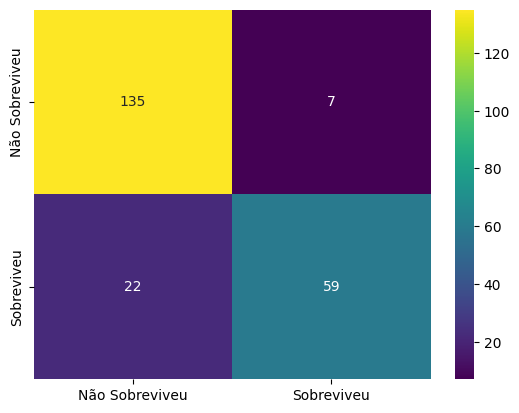

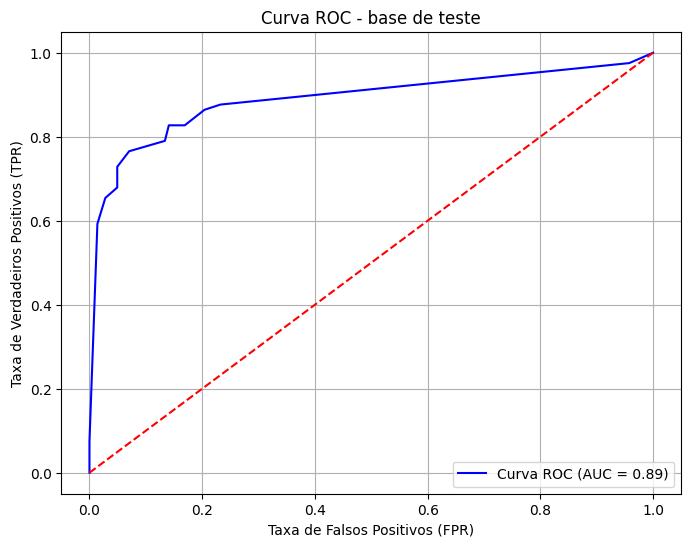

In [26]:
# avaliar.
print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')